In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import math
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv("ma20-50datas.csv") 

df

,date,open,high,low,close,volume,ma20,ma50
0,2008.08.01 00:00:00,1.55960,1.55980,1.55150,1.55630,10960,1.570024,1.570527
1,2008.08.04 00:00:00,1.55740,1.56310,1.55530,1.55710,9931,1.568793,1.570000
2,2008.08.05 00:00:00,1.55700,1.55750,1.54450,1.54490,13179,1.566518,1.569016
3,2008.08.06 00:00:00,1.54500,1.55160,1.53980,1.54130,11009,1.564116,1.567929
4,2008.08.07 00:00:00,1.54120,1.55020,1.53100,1.53230,13382,1.561086,1.566532
...,...,...,...,...,...,...,...,...
3718,2022.11.30 00:00:00,1.03290,1.04280,1.02891,1.04048,144820,1.025294,1.011498
3719,2022.12.01 00:00:00,1.04046,1.05324,1.03919,1.05226,154191,1.027862,1.013097
3720,2022.12.02 00:00:00,1.05208,1.05441,1.04273,1.05400,144061,1.030351,1.014701
3721,2022.12.05 00:00:00,1.05346,1.05942,1.04795,1.04890,119288,1.032118,1.016042


In [3]:
df["date"] = pd.to_datetime(df["date"])
df.index = df["date"]
del df["date"]
df

,open,high,low,close,volume,ma20,ma50
date,,,,,,,
2008-08-01,1.55960,1.55980,1.55150,1.55630,10960,1.570024,1.570527
2008-08-04,1.55740,1.56310,1.55530,1.55710,9931,1.568793,1.570000
2008-08-05,1.55700,1.55750,1.54450,1.54490,13179,1.566518,1.569016
2008-08-06,1.54500,1.55160,1.53980,1.54130,11009,1.564116,1.567929
2008-08-07,1.54120,1.55020,1.53100,1.53230,13382,1.561086,1.566532
...,...,...,...,...,...,...,...
2022-11-30,1.03290,1.04280,1.02891,1.04048,144820,1.025294,1.011498
2022-12-01,1.04046,1.05324,1.03919,1.05226,154191,1.027862,1.013097
2022-12-02,1.05208,1.05441,1.04273,1.05400,144061,1.030351,1.014701


In [4]:
features = df[['close','volume','ma20','ma50']]

features

,close,volume,ma20,ma50
date,,,,
2008-08-01,1.55630,10960,1.570024,1.570527
2008-08-04,1.55710,9931,1.568793,1.570000
2008-08-05,1.54490,13179,1.566518,1.569016
2008-08-06,1.54130,11009,1.564116,1.567929
2008-08-07,1.53230,13382,1.561086,1.566532
...,...,...,...,...
2022-11-30,1.04048,144820,1.025294,1.011498
2022-12-01,1.05226,154191,1.027862,1.013097
2022-12-02,1.05400,144061,1.030351,1.014701


array([<AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>,
       <AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>],
      dtype=object)

<Figure size 1440x1152 with 0 Axes>

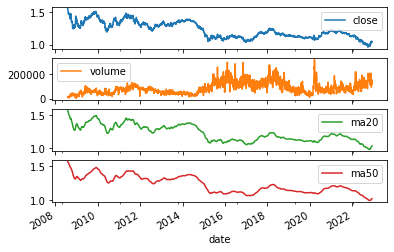

In [5]:
plt.figure(figsize=(20,16))
features.plot(subplots=True)

In [6]:
closevalue   = features['close'].values
volumevalue  = features['volume'].values
ma20value    = features['ma20'].values
ma50value    = features['ma50'].values

traindatalen = math.ceil(len(closevalue)*0.8)
validdatalen = len(closevalue[traindatalen:])

print("train data lentgh: ",traindatalen)
print("validation data lentgh: ",validdatalen)
print("values shape: ", closevalue.shape)

train data lentgh:  2979
validation data lentgh:  744
values shape:  (3723,)


In [7]:
scaler = MinMaxScaler(feature_range=(0,1))
volumscaler = MinMaxScaler(feature_range=(0,1))
closescaler = MinMaxScaler(feature_range=(0,1))

closevalue = closescaler.fit_transform(closevalue.reshape(-1,1)) 
volumevalue= volumscaler.fit_transform(volumevalue.reshape(-1,1))
ma20value = scaler.fit_transform(ma20value.reshape(-1,1))
ma50value = scaler.fit_transform(ma50value.reshape(-1,1))

scaleddata = np.hstack((closevalue,volumevalue,ma20value,ma50value))

traindata = scaleddata[0:traindatalen, :]
validdata = scaleddata[traindatalen:,:]
print("=======[scaled data shape: ",scaleddata.shape,"]=======")

=======[scaled data shape:  (3723, 4) ]=======


In [8]:
display(pd.DataFrame(scaleddata,columns=features.columns,index=features.index))

,close,volume,ma20,ma50
date,,,,
2008-08-01,0.998662,0.023653,1.000000,1.000000
2008-08-04,1.000000,0.020389,0.997913,0.999091
2008-08-05,0.979593,0.030691,0.994055,0.997393
2008-08-06,0.973572,0.023808,0.989984,0.995518
2008-08-07,0.958517,0.031335,0.984846,0.993107
...,...,...,...,...
2022-11-30,0.135856,0.448237,0.076487,0.035429
2022-12-01,0.155560,0.477960,0.080841,0.038188
2022-12-02,0.158470,0.445829,0.085061,0.040955


In [9]:
def multivariatewindowing(dataset,target,start,end,window_size, target_size, step,single_step=False):
    
    data , labels = [], []
    
    start = start + window_size
    
    if end is None:
        end = len(dataset) - target_size
        
    for i in range(start, end):
        indices = range(i-window_size,i,step)
        data.append(dataset[indices])
        
        if single_step:
            
            labels.append(target[i+target_size])
        else:
            labels.append(target[i:i+target_size])
            
    return np.array(data) , np.array(labels)

In [10]:
xtrain, ytrain = multivariatewindowing(scaleddata,scaleddata[:,0],0,traindatalen
                                       ,100,1,1,single_step=True)

xvalid, yvalid = multivariatewindowing(scaleddata,scaleddata[:,0],traindatalen-101,None
                                       ,100,1,1,single_step=True)

print("windowing and reshaping data done!")

windowing and reshaping data done!


In [11]:
print("xtrain dada shape: ",xtrain.shape)

print("ytrain dada shape: ",ytrain.shape)

print("xvalid dada shape: ",xvalid.shape)

print("yvalid dada shape: ",yvalid.shape)

xtrain dada shape:  (2879, 100, 4)
ytrain dada shape:  (2879,)
xvalid dada shape:  (744, 100, 4)
yvalid dada shape:  (744,)


In [12]:
model = keras.Sequential()
model.add(layers.LSTM(100,return_sequences=True,input_shape=(xtrain.shape[1],4)))

model.add(layers.LSTM(100,return_sequences=False))
#model.add(layers.Dense(20))
model.add(layers.Dense(1))
model.summary()
print("shape if input data: ",model.input_shape)
print("shape if output data: ",model.output_shape)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 100)          42000     
                                                                 
 lstm_1 (LSTM)               (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 122,501
Trainable params: 122,501
Non-trainable params: 0
_________________________________________________________________
shape if input data:  (None, 100, 4)
shape if output data:  (None, 1)


In [13]:
model.compile(optimizer=keras.optimizers.RMSprop(), loss='mae')
model.fit(xtrain, ytrain, batch_size=1, epochs=5)

Epoch 1/5
2879/2879 [==============================] - 62s 21ms/step - loss: 0.0363
Epoch 2/5
2879/2879 [==============================] - 59s 21ms/step - loss: 0.0233
Epoch 3/5
2879/2879 [==============================] - 59s 20ms/step - loss: 0.0210
Epoch 4/5
2879/2879 [==============================] - 59s 20ms/step - loss: 0.0198
Epoch 5/5
2879/2879 [==============================] - 59s 20ms/step - loss: 0.0188


In [14]:
predictions = model.predict(xvalid)
predictions = closescaler.inverse_transform(predictions)
yval = closescaler.inverse_transform(yvalid.reshape(-1,1))
rmse = np.sqrt(np.mean(predictions - yval)**2)
print("root mean square Error: ",rmse)

24/24 [==============================] - 1s 15ms/step
root mean square Error:  0.007291931712729953


C:\Users\Yaser\AppData\Local\Temp\ipykernel_10104\2322224942.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newvalid['predictions'], newvalid['yval'] = predictions, yval
C:\Users\Yaser\AppData\Local\Temp\ipykernel_10104\2322224942.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newvalid['predictions'], newvalid['yval'] = predictions, yval


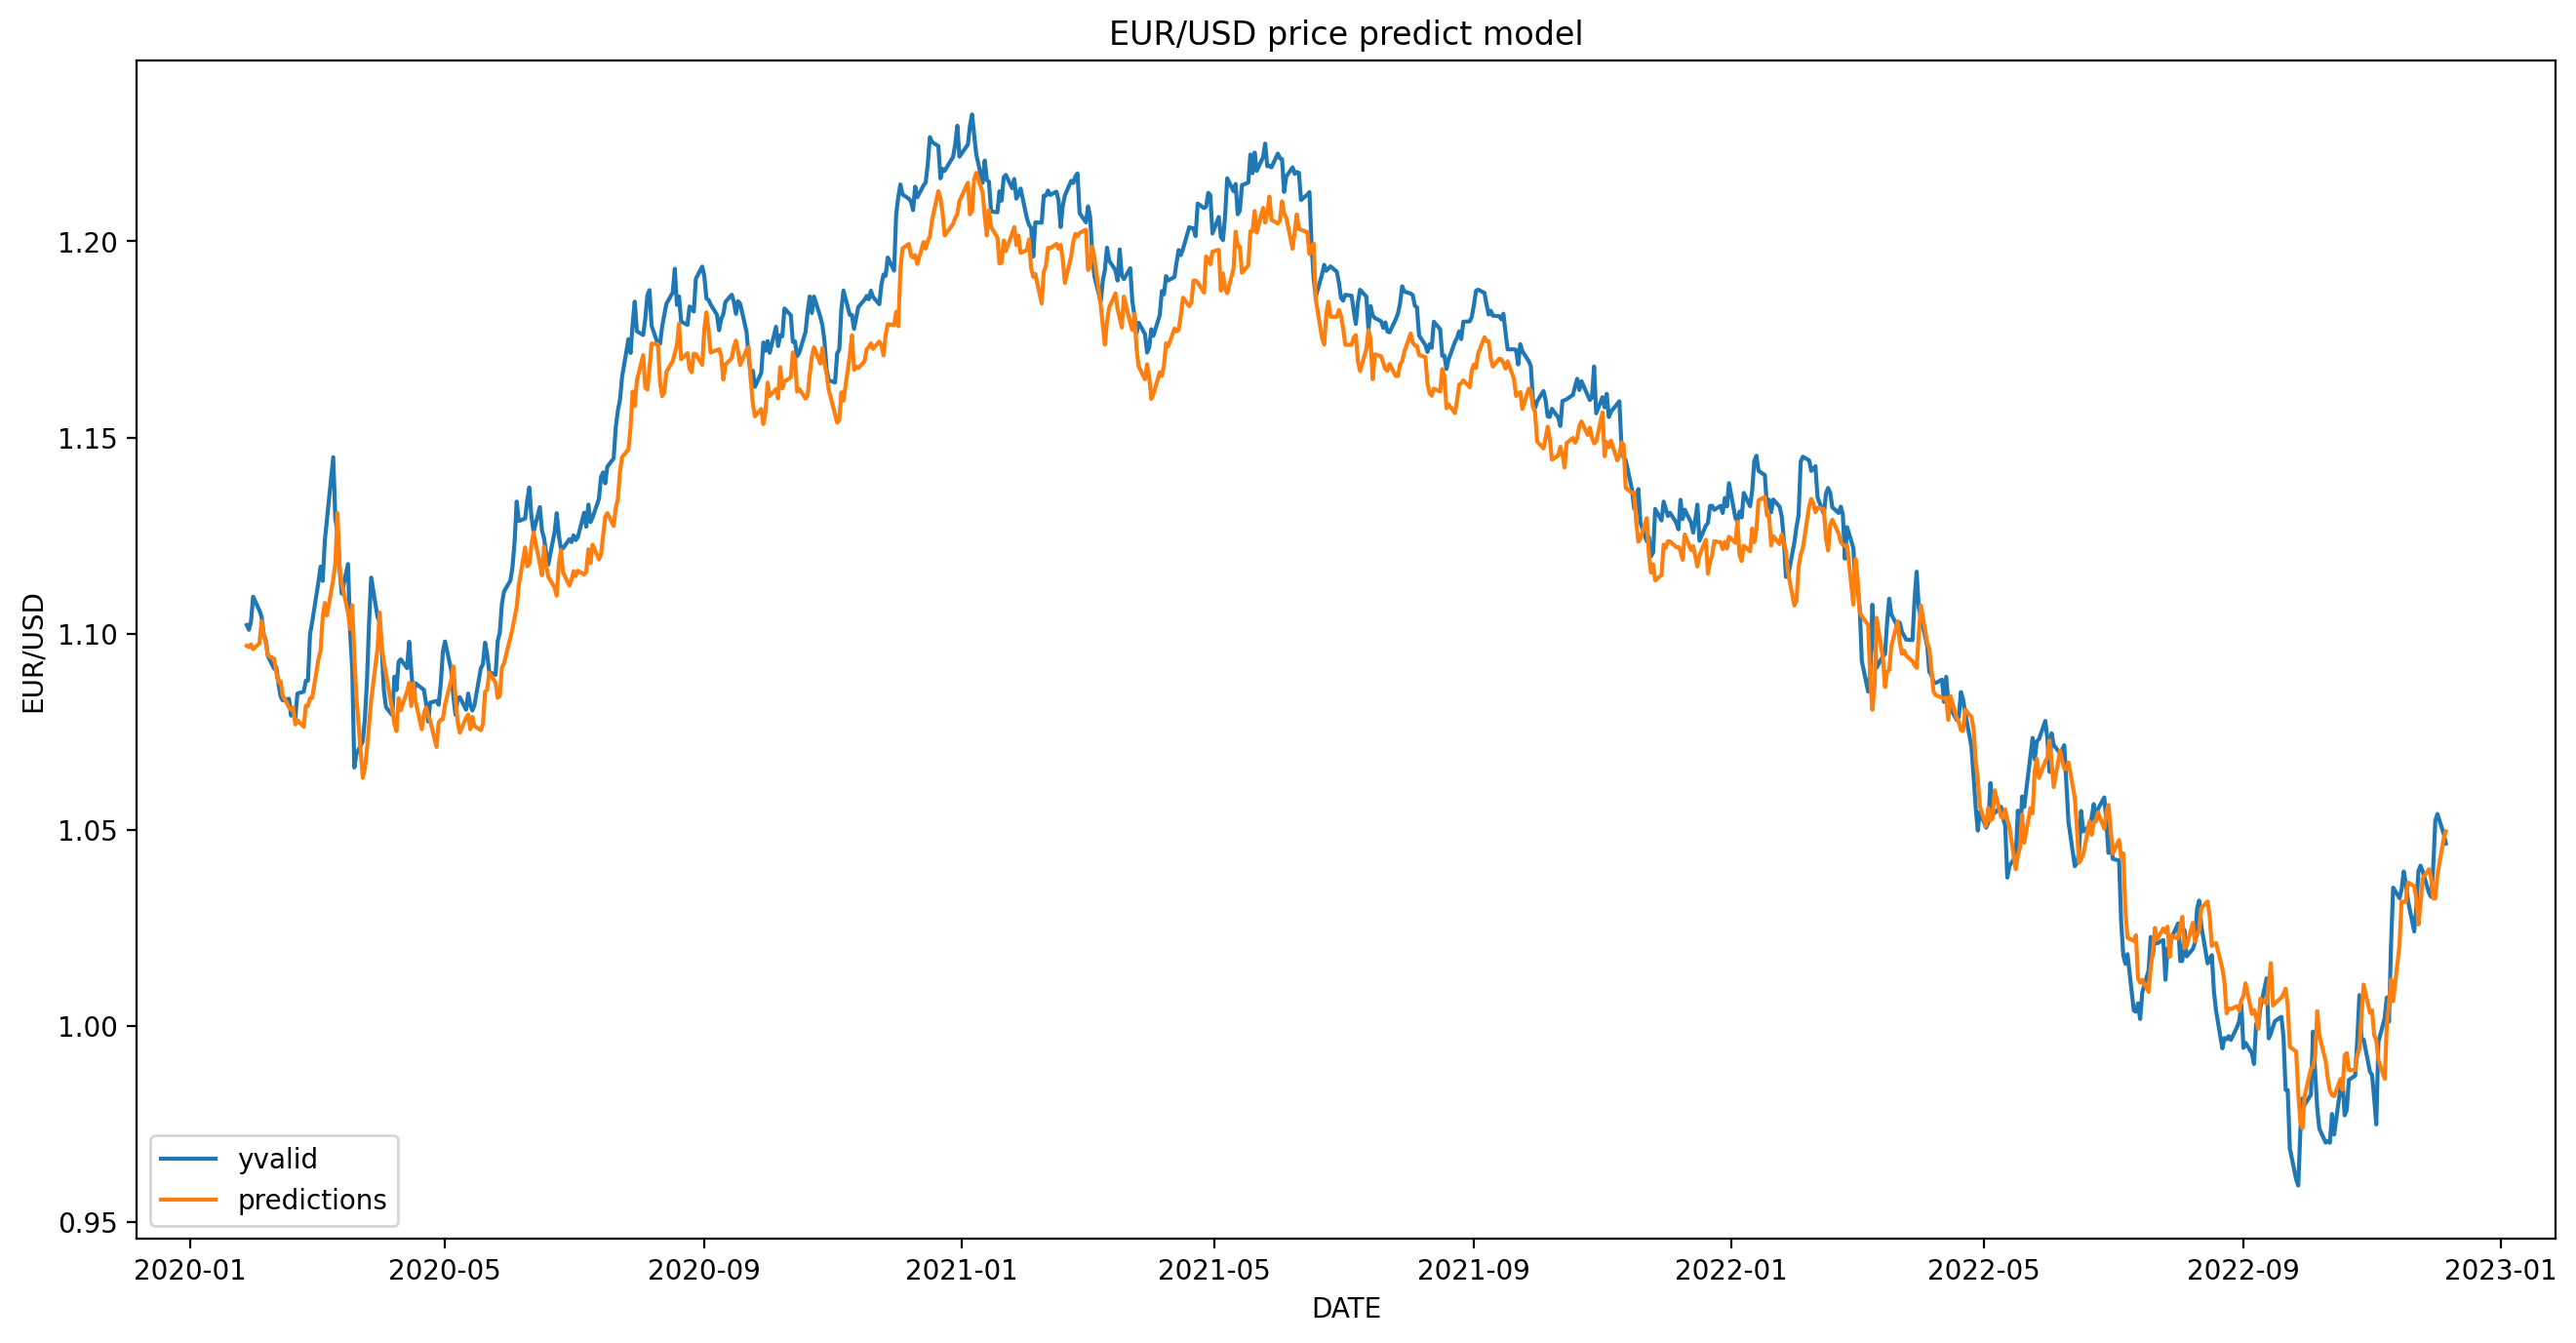

In [15]:
data = features.filter(['close'])
newvalid = data[traindatalen:]
newvalid['predictions'], newvalid['yval'] = predictions, yval
plt.figure(figsize=(16,8),dpi=200)
plt.title('EUR/USD price predict model')
plt.xlabel('DATE')
plt.ylabel('EUR/USD')
plt.plot(newvalid[['yval','predictions']])
plt.legend(['yvalid','predictions'], loc='lower left')
plt.show()

In [17]:
newvalid[['predictions','yval']]

,predictions,yval
date,,
2020-01-28,1.096896,1.10217
2020-01-29,1.096559,1.10096
2020-01-30,1.097235,1.10309
2020-01-31,1.096009,1.10940
2020-02-03,1.097502,1.10589
...,...,...
2022-11-30,1.032485,1.04048
2022-12-01,1.032487,1.05226
2022-12-02,1.038456,1.05400
